# In-Depth Analysis and Machine Learning

First we will evaluate several supervised machine learning techniques with default hyperparameters. Then we will perform hyperparameter tuning on the best peforming default estimators.

Classifiers: Random Forest, Support Vector Machines, Naive Bayes, K-Nearest Neighbor, XGBoost

Model Evaluation Metrics: accuracy, precision, recall, f1-score


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/final_spotify_data.csv')

In [4]:
## FIRST NEED TO PUT GENRES INTO NUMERICAL CLASSES

g = ['workout', 'chill', 'party', 'focus']

df['labels'] = df['playlist']

d = dict(zip(g, range(0,4)))

df['labels'] = df['labels'].map(d, na_action='ignore')


In [5]:
from sklearn.model_selection import train_test_split

## SPLIT INTO TRAINING AND TEST

X = df.drop(['labels', 'playlist','id','name','uri_x'], axis = 1)
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)
### STANDARD PARAMETERS ###
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)

y_pred = rfclf.predict(X_test)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print("\n Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy:", (accuracy_score(y_test,y_pred)))


 Confusion Matrix:
 [[102   9  68   1]
 [ 15 138   7  13]
 [ 64   6 112   0]
 [  8  11   3 153]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.57      0.55       180
           1       0.84      0.80      0.82       173
           2       0.59      0.62      0.60       182
           3       0.92      0.87      0.89       175

   micro avg       0.71      0.71      0.71       710
   macro avg       0.72      0.71      0.72       710
weighted avg       0.72      0.71      0.71       710

Accuracy: 0.7112676056338029


c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Support Vector Machine

In [7]:
from sklearn.svm import SVC

# scale data for svm 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svmclf = SVC()
svmclf = svmclf.fit(X_train_scaled, y_train)
svm_pred = svmclf.predict(X_test_scaled)
  

print('\n Confusion Matrix:\n',confusion_matrix(y_test,svm_pred))
print("\n Classification Report: \n", classification_report(y_test, svm_pred))
print("Accuracy:", (accuracy_score(y_test,svm_pred)))


 Confusion Matrix:
 [[ 99   7  72   2]
 [  6 133  14  20]
 [ 53   7 122   0]
 [  5  10   5 155]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.55      0.58       180
           1       0.85      0.77      0.81       173
           2       0.57      0.67      0.62       182
           3       0.88      0.89      0.88       175

   micro avg       0.72      0.72      0.72       710
   macro avg       0.73      0.72      0.72       710
weighted avg       0.72      0.72      0.72       710

Accuracy: 0.7169014084507043


c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


### Naive Bayes

In [8]:
# naive bayes

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train_scaled, y_train) 
gnb_predictions = gnb.predict(X_test_scaled) 
  

print('\n Confusion Matrix:\n',confusion_matrix(y_test,gnb_predictions))
print("\n Classification Report: \n", classification_report(y_test, gnb_predictions))
print("Accuracy:", (accuracy_score(y_test, gnb_predictions)))


 Confusion Matrix:
 [[ 90   5  81   4]
 [  8 129  22  14]
 [ 42  11 128   1]
 [ 17  25   3 130]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.50      0.53       180
           1       0.76      0.75      0.75       173
           2       0.55      0.70      0.62       182
           3       0.87      0.74      0.80       175

   micro avg       0.67      0.67      0.67       710
   macro avg       0.69      0.67      0.68       710
weighted avg       0.69      0.67      0.67       710

Accuracy: 0.671830985915493


### KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

Knnclf = KNeighborsClassifier(n_neighbors=3)
Knnclf.fit(X_train_scaled, y_train)

knn_predictions = Knnclf.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,knn_predictions))
print("\n Classification Report: \n", classification_report(y_test, knn_predictions))
print("Accuracy:", (accuracy_score(y_test, knn_predictions)))


 Confusion Matrix:
 [[107   7  66   0]
 [ 22 125  11  15]
 [ 73   7 101   1]
 [  9  17   4 145]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.59      0.55       180
           1       0.80      0.72      0.76       173
           2       0.55      0.55      0.55       182
           3       0.90      0.83      0.86       175

   micro avg       0.67      0.67      0.67       710
   macro avg       0.69      0.68      0.68       710
weighted avg       0.69      0.67      0.68       710

Accuracy: 0.6732394366197183


### XGBOOST

In [10]:
#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,xgb_pred))
print("\n Classification Report: \n", classification_report(y_test, xgb_pred))
print("Accuracy:", (accuracy_score(y_test,xgb_pred)))


 Confusion Matrix:
 [[102   9  68   1]
 [ 10 138  11  14]
 [ 42   5 134   1]
 [  3   8   3 161]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.57      0.61       180
           1       0.86      0.80      0.83       173
           2       0.62      0.74      0.67       182
           3       0.91      0.92      0.91       175

   micro avg       0.75      0.75      0.75       710
   macro avg       0.76      0.76      0.76       710
weighted avg       0.76      0.75      0.75       710

Accuracy: 0.7535211267605634


### Default Estimators Accuracy Scores

In [11]:
print("Random Forest:", "%.2f%%" %(accuracy_score(y_test,y_pred)*100))
print("SVM:", "%.2f%%" %(accuracy_score(y_test,svm_pred)*100))
print("Naive Bayes:", "%.2f%%" %(accuracy_score(y_test,gnb_predictions)*100))
print("KNN:", "%.2f%%" %(accuracy_score(y_test,knn_predictions)*100))
print("XGBoost:", "%.2f%%" %(accuracy_score(y_test,xgb_pred)*100))

Random Forest: 71.13%
SVM: 71.69%
Naive Bayes: 67.18%
KNN: 67.32%
XGBoost: 75.35%


Random Forest, SVM and XGBoost models had the best performance with their default hyperparameters. Now let's tune these models.

## Hyperparameter Tuning

Now we will find optimal hyperparameters by using a grid search method. This method searches through a grid of parameters for each model, returning the parameters that give the highest k-fold cross validation score.

### Tuned Random Forest

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(20,200,10), # Number of trees in random forest
              'min_samples_split': [2,100,1000],
              'max_features': ['auto', 'sqrt']} # Method of selecting samples for training each tree



cv = GridSearchCV(rfclf, param_grid, cv=5)
cv.fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 70}


In [13]:
ne = cv.best_params_['n_estimators']
mf = cv.best_params_['max_features']
ms = cv.best_params_['min_samples_split']

rfclf_tuned = RandomForestClassifier(n_estimators=ne, max_features=mf, min_samples_split=ms)

rfclf_tuned.fit(X_train, y_train)

rfclf_pred = rfclf_tuned.predict(X_test)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,rfclf_pred))
print("\n Classification Report: \n", classification_report(y_test, rfclf_pred))                                                
print("Accuracy:", (accuracy_score(y_test,rfclf_pred)))


 Confusion Matrix:
 [[105   9  66   0]
 [  7 141  10  15]
 [ 52   6 124   0]
 [  5   8   5 157]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.58      0.60       180
           1       0.86      0.82      0.84       173
           2       0.60      0.68      0.64       182
           3       0.91      0.90      0.90       175

   micro avg       0.74      0.74      0.74       710
   macro avg       0.75      0.74      0.75       710
weighted avg       0.75      0.74      0.74       710

Accuracy: 0.7422535211267606


[Text(0, 0.5, 'workout'),
 Text(0, 1.5, 'chill'),
 Text(0, 2.5, 'party'),
 Text(0, 3.5, 'focus')]

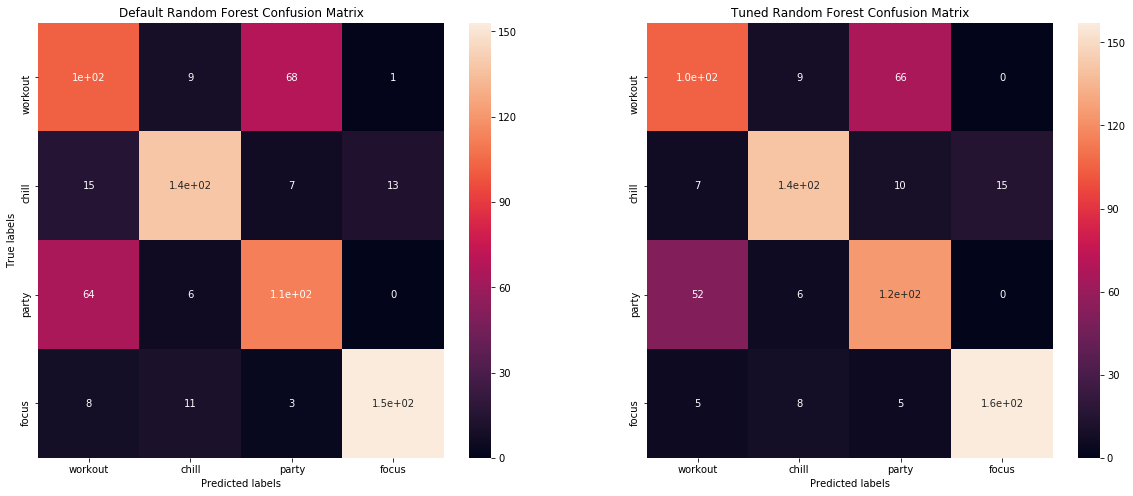

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt     

fig = plt.figure(figsize = (20,8))

ax= fig.add_subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, rfclf.predict(X_test)), annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Default Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])

ax2= fig.add_subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, rfclf_pred), annot=True, ax = ax2); 

# labels, title and ticks
ax2.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax2.set_title('Tuned Random Forest Confusion Matrix'); 
ax2.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax2.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])

Our accuracy score for Random Forest increased by 4.08%

### Tuned SVM

In [29]:
param_grid_svm = {'C': np.arange(1,2,.01)}


grid_search = GridSearchCV(SVC(gamma='auto'), param_grid_svm, cv=5)

grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)


{'C': 1.3700000000000003}


In [30]:
svmclf_tuned = SVC(C=1.3700000000000003, gamma='auto')

svmclf_tuned.fit(X_train_scaled, y_train)

svm_tuned_pred = svmclf_tuned.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,svm_tuned_pred))
print("\n Classification Report: \n", classification_report(y_test, svm_tuned_pred)) 
print("Accuracy:", (accuracy_score(y_test,svm_tuned_pred)))


 Confusion Matrix:
 [[102   7  69   2]
 [  7 134  14  18]
 [ 51   8 123   0]
 [  6   9   4 156]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.57      0.59       180
           1       0.85      0.77      0.81       173
           2       0.59      0.68      0.63       182
           3       0.89      0.89      0.89       175

   micro avg       0.73      0.73      0.73       710
   macro avg       0.73      0.73      0.73       710
weighted avg       0.73      0.73      0.73       710

Accuracy: 0.7253521126760564


[Text(0, 0.5, 'workout'),
 Text(0, 1.5, 'chill'),
 Text(0, 2.5, 'party'),
 Text(0, 3.5, 'focus')]

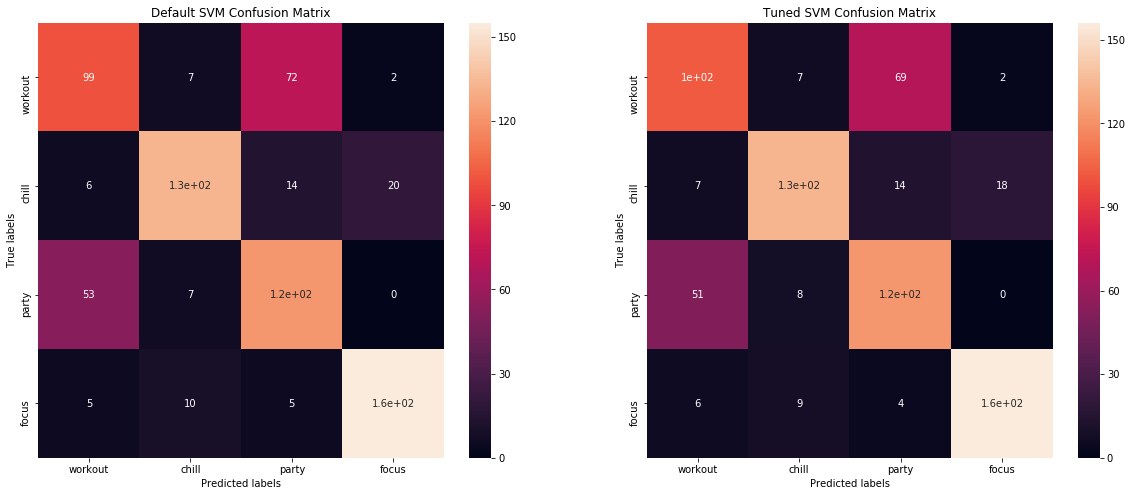

In [51]:
fig = plt.figure(figsize = (20,8))

ax= fig.add_subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Default SVM Confusion Matrix'); 
ax.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])

ax2= fig.add_subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, svm_tuned_pred), annot=True, ax = ax2); 

# labels, title and ticks
ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
ax2.set_title('Tuned SVM Confusion Matrix'); 
ax2.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax2.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])

Our accuracy score increased by 0.85% by tuning 'C'.


### Tuned XGBoost

We tune max_depth and min_child_weight first, as they will have the highest impact on model outcome. These parameters can be used to control the complexity of the trees. 

In [34]:
# tune XGBoost
param_grid3 = { 'max_depth':range(1,5,1), 'min_child_weight':range(1,5,1)}


grid_search_XG = GridSearchCV(XGBClassifier(), param_grid3, cv=5)

grid_search_XG.fit(X_train_scaled, y_train)
print(grid_search_XG.best_params_, grid_search_XG.best_score_)


{'max_depth': 2, 'min_child_weight': 2} 0.7255038220986796


In [35]:
xgb_tuned = XGBClassifier(
 max_depth=2,
 min_child_weight=2,
)


xgb_tuned.fit(X_train_scaled, y_train)

xgb_pred2 = xgb_tuned.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,xgb_pred2))
print("\n Classification Report: \n", classification_report(y_test, xgb_pred2))
print("Accuracy:", (accuracy_score(y_test,xgb_pred2)))


 Confusion Matrix:
 [[106   8  65   1]
 [ 11 137  10  15]
 [ 45   7 129   1]
 [  3  10   2 160]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.59      0.61       180
           1       0.85      0.79      0.82       173
           2       0.63      0.71      0.66       182
           3       0.90      0.91      0.91       175

   micro avg       0.75      0.75      0.75       710
   macro avg       0.75      0.75      0.75       710
weighted avg       0.75      0.75      0.75       710

Accuracy: 0.7492957746478873


Since tuning the hyperparameters for XGBoost is not improving our scores. However, since it is still our highest score, I will see if I have improve the model by implementing feature selection. 

#### Feature Importance and Selection

We will use Feature importance scores for feature selection.


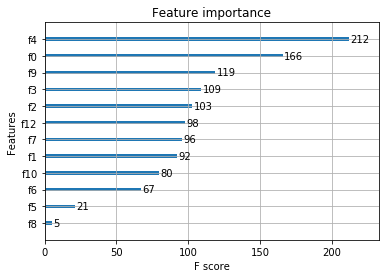

In [36]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb_tuned)
plt.show()

From an article, I found a code that uses the SelectFromModel class to test multiple thresholds for selecting features by feature importance. It allows us to test each subset of features by importance, starting with all features and ending with a subset with the most important feature.

In [37]:
#adapted from https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(xgb_tuned.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_tuned, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_scaled)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test_scaled)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=13, Accuracy: 75.35%
Thresh=0.018, n=12, Accuracy: 75.49%
Thresh=0.019, n=11, Accuracy: 75.21%
Thresh=0.021, n=10, Accuracy: 73.80%
Thresh=0.031, n=9, Accuracy: 73.66%
Thresh=0.066, n=8, Accuracy: 73.38%
Thresh=0.067, n=7, Accuracy: 72.11%
Thresh=0.076, n=6, Accuracy: 71.97%
Thresh=0.099, n=5, Accuracy: 70.70%
Thresh=0.099, n=4, Accuracy: 68.03%
Thresh=0.109, n=3, Accuracy: 66.48%
Thresh=0.177, n=2, Accuracy: 63.80%
Thresh=0.219, n=1, Accuracy: 51.27%


Optimal threshold is using 12 features. I will revalute the model with this threshold.

In [38]:
selection = SelectFromModel(xgb_tuned, threshold=0.018, prefit=True)
select_X_train = selection.transform(X_train_scaled)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test_scaled)
y_pred = selection_model.predict(select_X_test)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print("\n Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy:", (accuracy_score(y_test,y_pred)))


 Confusion Matrix:
 [[103   9  67   1]
 [ 10 138  11  14]
 [ 42   5 134   1]
 [  3   8   3 161]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.57      0.61       180
           1       0.86      0.80      0.83       173
           2       0.62      0.74      0.68       182
           3       0.91      0.92      0.91       175

   micro avg       0.75      0.75      0.75       710
   macro avg       0.76      0.76      0.76       710
weighted avg       0.76      0.75      0.75       710

Accuracy: 0.7549295774647887


[Text(0, 0.5, 'workout'),
 Text(0, 1.5, 'chill'),
 Text(0, 2.5, 'party'),
 Text(0, 3.5, 'focus')]

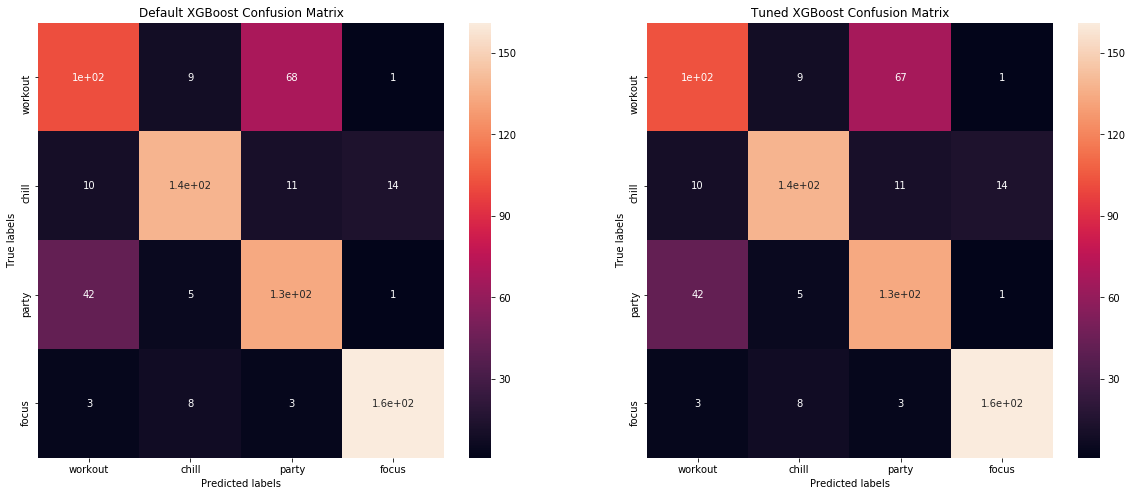

In [53]:
fig = plt.figure(figsize = (20,8))

ax= fig.add_subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Default XGBoost Confusion Matrix'); 
ax.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])

ax2= fig.add_subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax2); 

# labels, title and ticks
ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
ax2.set_title('Tuned XGBoost Confusion Matrix'); 
ax2.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax2.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])

By using this feature threshold, the performance improved by 0.15%. XGBoost is our best performing model at 75.49% accuracy. 

Notice that the scores for class '0' (workout) and class '2' (party) are consistently lower than the other classes for all our models. From the confusion matrix, you can tell that the workout and party class scores are low because our estimators often 'confuse' the two. For true labels of party, the model predicted workout 67 times. For true labels of workout, our estimator predicted party 42 times. 

This is not a shock since during our EDA, we found that workout and party distributions were very similar. This can be improved by adding more features to our dataset. Future recommendations include adding metadata of the song artist or gathering other sound metrics.